# Predicting Emotions Through Audio Analysis




## Connecting with kaggle to load the data




In [3]:
#! pip install kaggle (uncomment this to run the cell)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! mkdir ~/.kaggle

In [4]:
!cp /content/drive/MyDrive/Kaggle_credentials/kaggle.json ~/.kaggle/kaggle.json

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download ejlok1/toronto-emotional-speech-set-tess

 96% 411M/428M [00:03<00:00, 129MB/s]
100% 428M/428M [00:03<00:00, 127MB/s]


In [6]:
#!unzip /content/toronto-emotional-speech-set-tess.zip (uncomment this to run the cell)

In [8]:
! pip3 install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Loading the necessary Libraries

In [9]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
# librosa is a Python library for analyzing audio and music. 
# It can be used to extract the data from the audio files 
import librosa 
import librosa.display
from IPython.display import Audio #To play the audio
from keras.models import load_model
from pydub import AudioSegment, effects
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## Defining the path to create dataframes

In [10]:
extracted_features =[]
labels=[]
path=[]

for dirname, _, filenames in os.walk('/content/tess toronto emotional speech set data'):
    for filename in filenames:
        # Defining a path
        path.append(os.path.join(dirname, filename))
        # Fetch the sample rate and waveform
        _, sr = librosa.load(path = os.path.join(dirname,filename), sr = None) 
        # Load the audio file
        rawsound = AudioSegment.from_file(os.path.join(dirname,filename)) 
        # Normalize the audio to +5.0 dBFS
        normalizedsound = effects.normalize(rawsound, headroom = 0)
        # Transform the normalized audio to np.array of samples
        normal_x = np.array(normalizedsound.get_array_of_samples(), dtype = 'float32')

        f3 = librosa.feature.mfcc(y=normal_x, sr=sr, n_mfcc=128) #MFCC
        f3 = np.mean(f3.T,axis=0)
        
        
        label = filename.split('_')[-1]
        label=label.split('.')[0]
        labels.append(label.lower())
        extracted_features.append([f3,label])

In [11]:
labels[:5]

['happy', 'happy', 'happy', 'happy', 'happy']

In [12]:
path[:5]

['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_chain_happy.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_late_happy.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_bought_happy.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_thin_happy.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_thumb_happy.wav']

In [13]:
df = pd.DataFrame()
df['speech']=path
df['labels']= labels
df.head()

,speech,labels
0,/content/tess toronto emotional speech set dat...,happy
1,/content/tess toronto emotional speech set dat...,happy
2,/content/tess toronto emotional speech set dat...,happy
3,/content/tess toronto emotional speech set dat...,happy
4,/content/tess toronto emotional speech set dat...,happy


In [14]:
df['labels'].value_counts()

happy      400
sad        400
fear       400
angry      400
ps         400
disgust    400
neutral    400
Name: labels, dtype: int64

## Creating function using librosa

We can also plot waveplots and spectograms for audio signals

Waveplots - Waveplots let us know the loudness of the audio at a given time.

Spectograms - A spectrogram is a visual representation of the spectrum of frequencies of sound or other signals as they vary with time. It’s a representation of frequencies changing with respect to time for given audio/music signals.

In [15]:
def waveshow(data, sampling_rate, emotion):
    plt.figure(figsize=(10,4))
    plt.title('Waveplot for audio with {} emotion'.format(emotion), size=15)
    librosa.display.waveshow(data, sr=sr)
    
def spectogram(data, sampling_rate, emotion):
    # stft function converts the data into short term fourier transform
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title('Spectrogram for audio with {} emotion'.format(emotion), size=15)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.show()

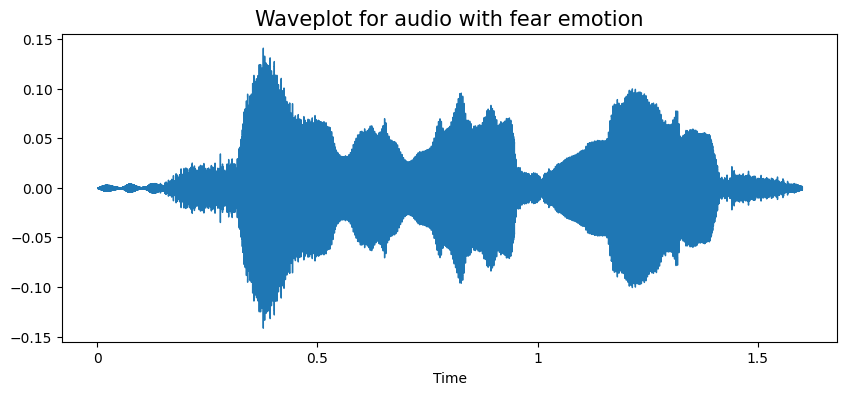

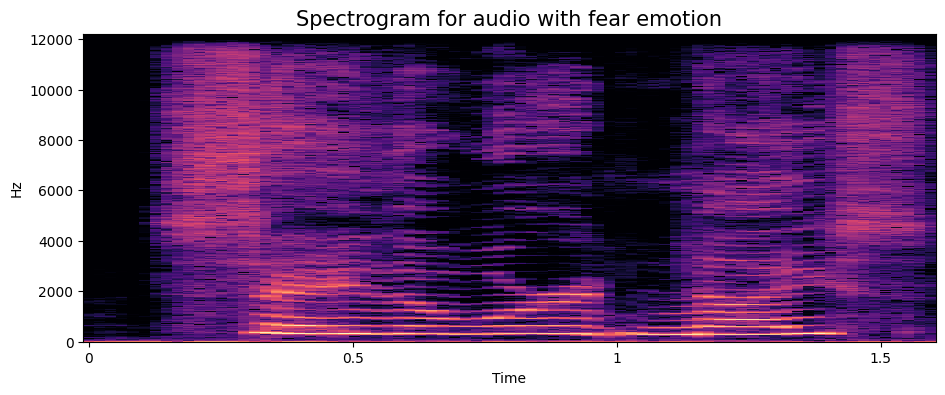

In [16]:
emotion = 'fear'
path = np.array(df['speech'][df['labels']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

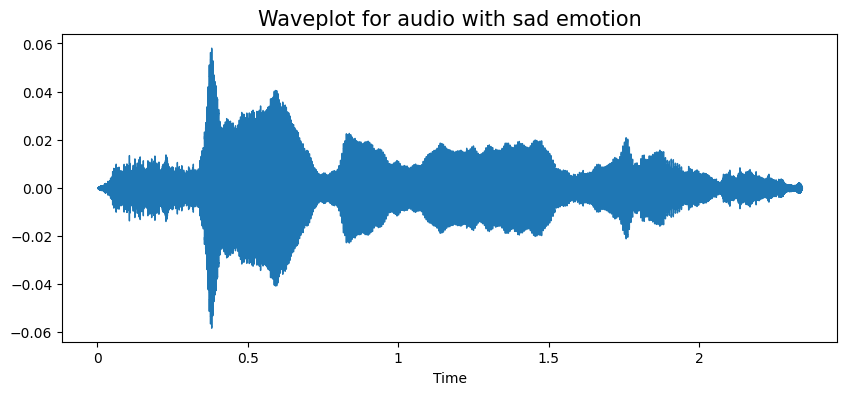

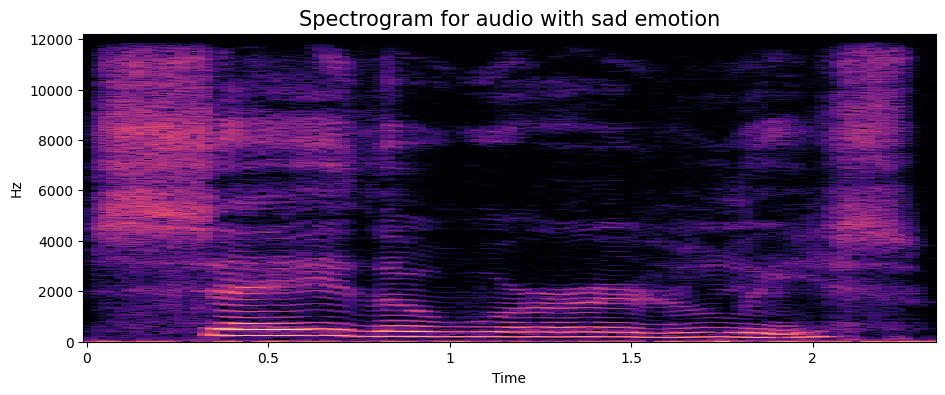

In [17]:
emotion = 'sad'
path = np.array(df['speech'][df['labels']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

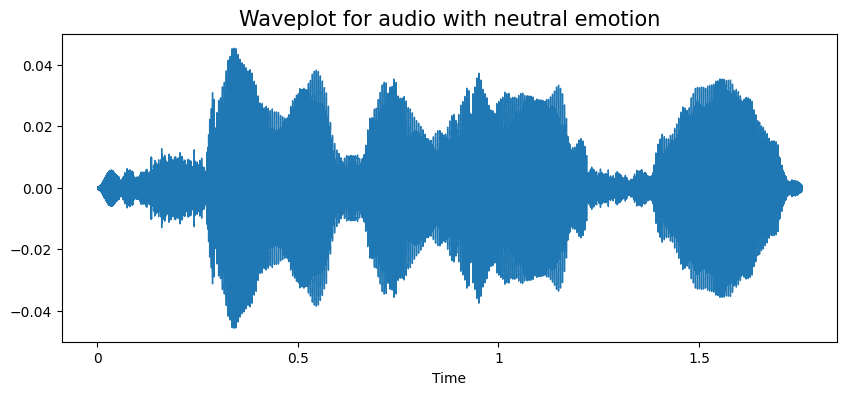

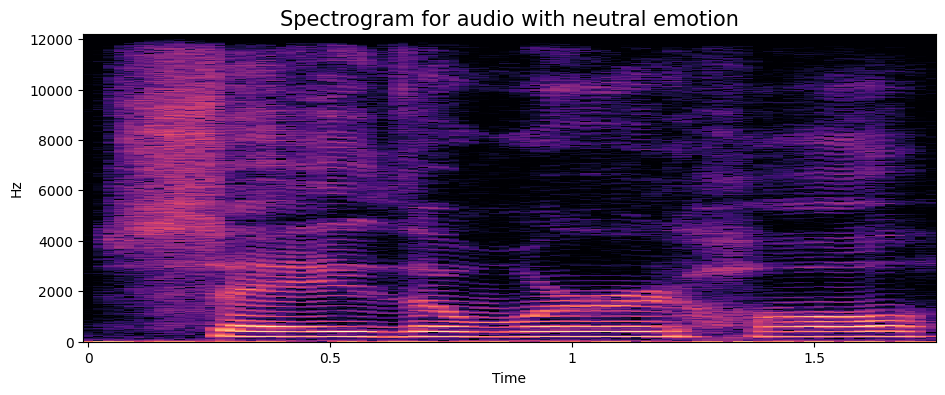

In [18]:
emotion = 'neutral'
path = np.array(df['speech'][df['labels']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

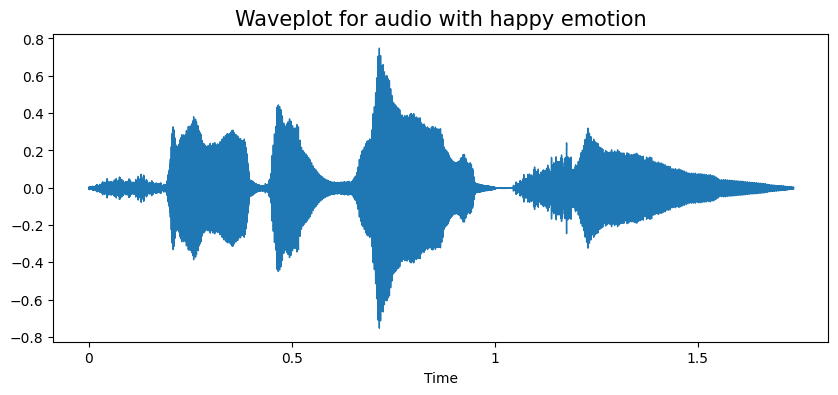

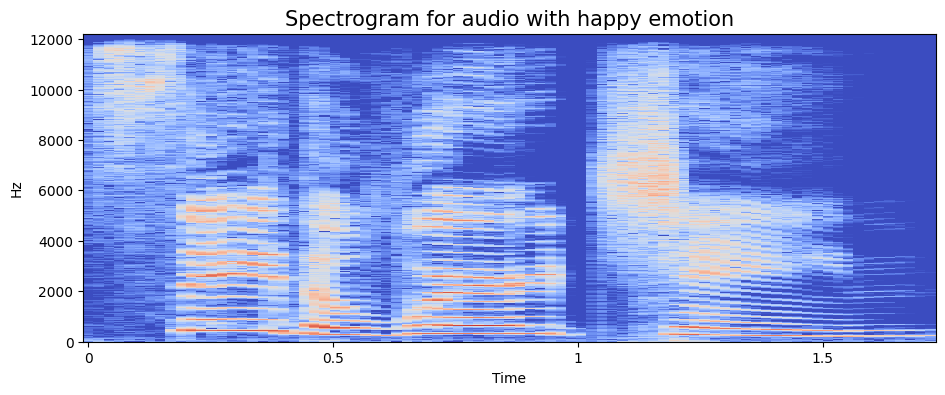

In [19]:
emotion = 'happy'
path = np.array(df['speech'][df['labels']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

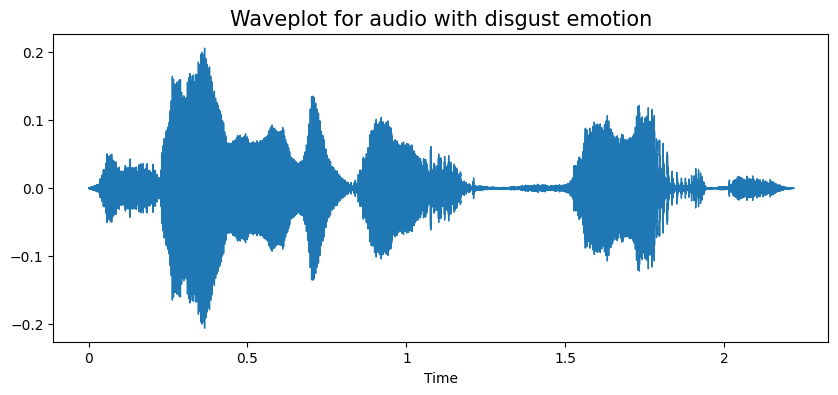

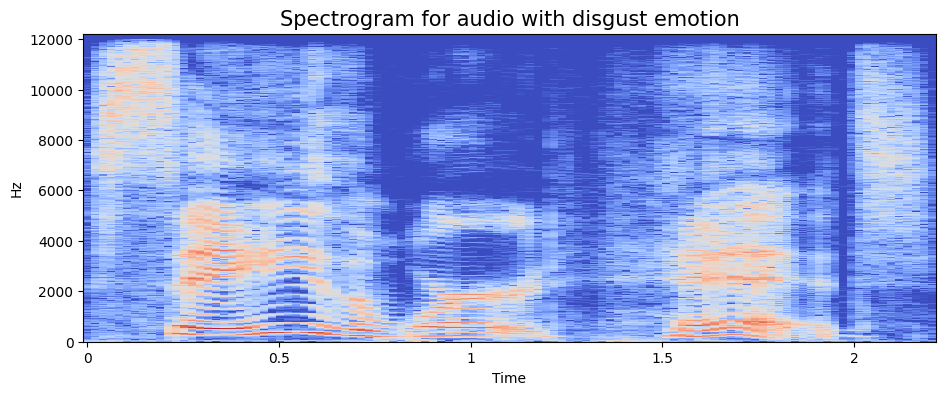

In [20]:
emotion = 'disgust'
path = np.array(df['speech'][df['labels']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

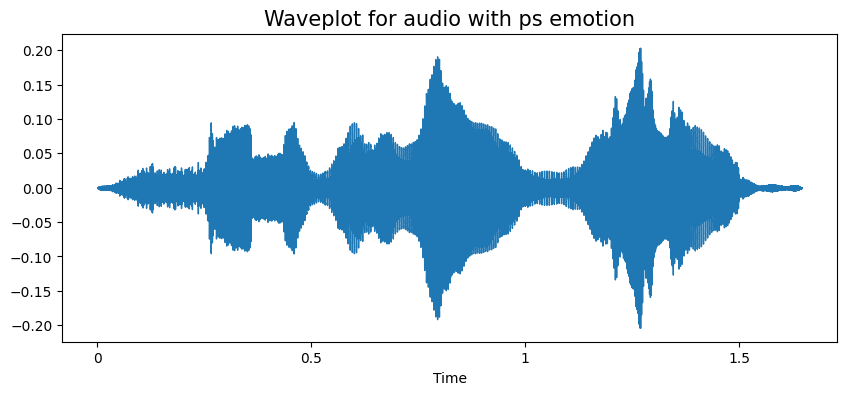

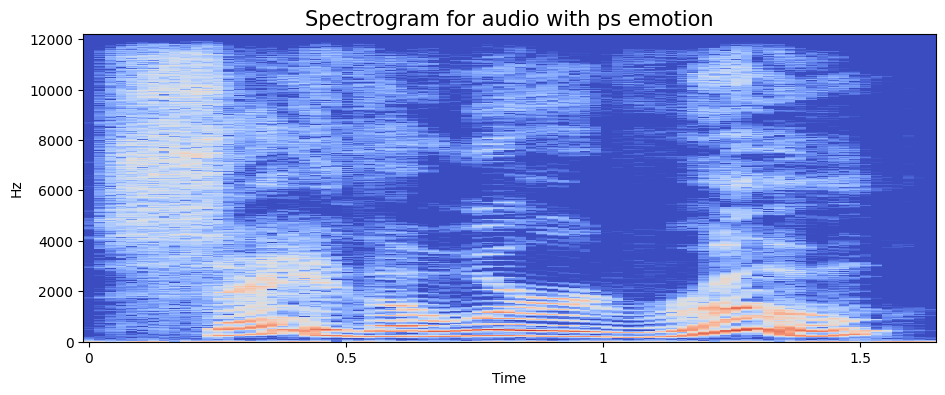

In [21]:
emotion = 'ps'
path = np.array(df['speech'][df['labels']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

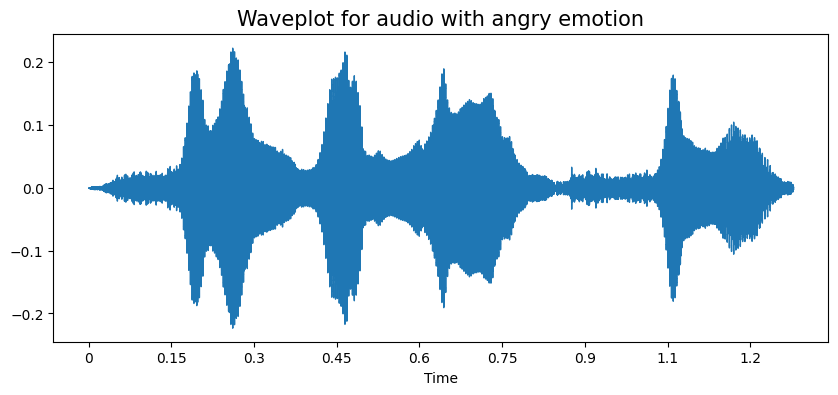

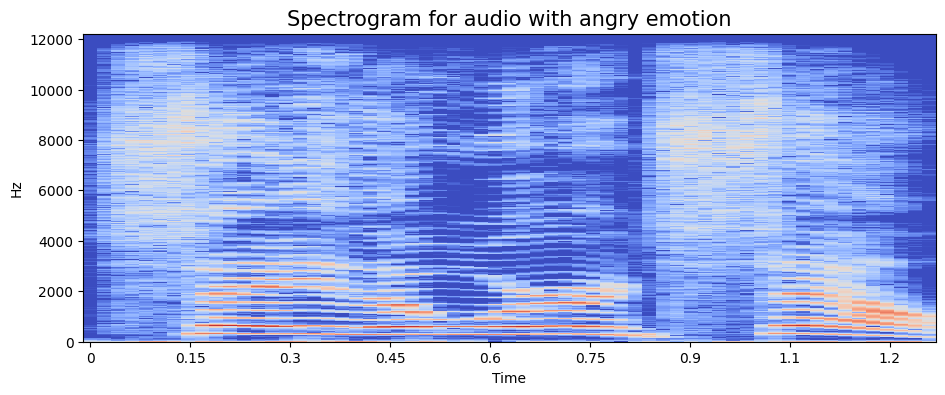

In [22]:
emotion = 'angry'
path = np.array(df['speech'][df['labels']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

## Data Augmentation Technique for Audio Data


In [23]:
def noise(data):
#   Noise adds a random amount of noise to the audio data. 
#   The amount of noise is proportional to the maximum amplitude of the original audio data.
    noise_amp = 0.085*np.random.uniform()*np.amax(data) #Higher the variabe is higher the noise will be 
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.5): 
#Stretch applies time stretching to the audio data. 
#The rate parameter controls the stretching factor, where a rate less than 1 will slow down the audio and a rate greater than 1 will speed it up
    return librosa.effects.time_stretch(data, rate=rate)

def shift(data):
  # shift applies shifting to the audio data by randomly rolling the audio data left or right. 
  # The amount of shifting is randomly chosen between -10 and 10 milliseconds.
    shift_range = int(np.random.uniform(low=-10, high = 10)*1000)
    return np.roll(data, shift_range)

def pitch(data, sr):
  #Pitch applies pitch shifting to the audio data by changing the pitch without changing the speed. 
  #The n_steps parameter controls the number of semitones to shift the pitch
    n_steps = int(np.random.uniform(low=-10, high=10))
    return librosa.effects.pitch_shift(data, sr=sr, n_steps=n_steps)

# taking any example and checking for techniques.
path = np.array(df['speech'][df['labels']==emotion])[0]
data, sample_rate = librosa.load(path)

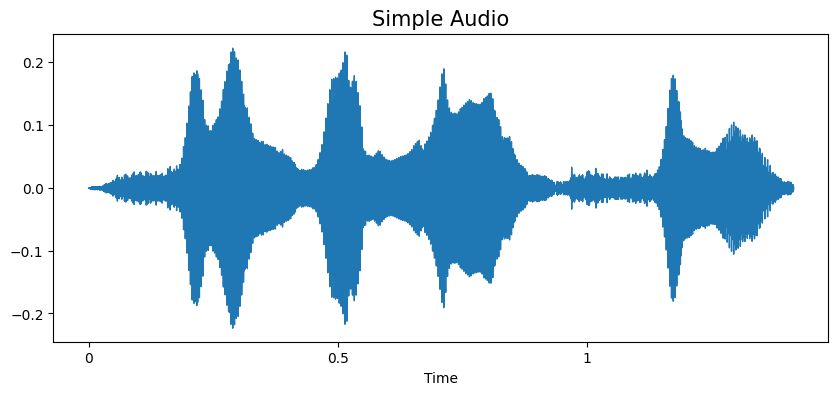

In [24]:
#Simple
plt.figure(figsize=(10,4))    
plt.title('Simple Audio', size=15)
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

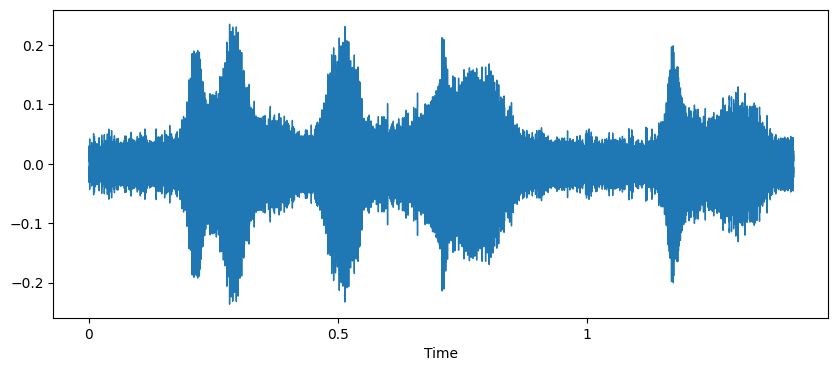

In [25]:
#Noise
x = noise(data)
plt.figure(figsize=(10,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

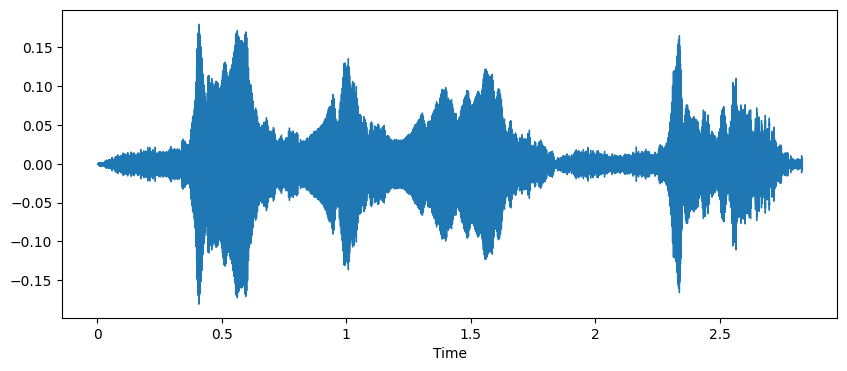

In [26]:
#Strech
x = stretch(data)
plt.figure(figsize=(10,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

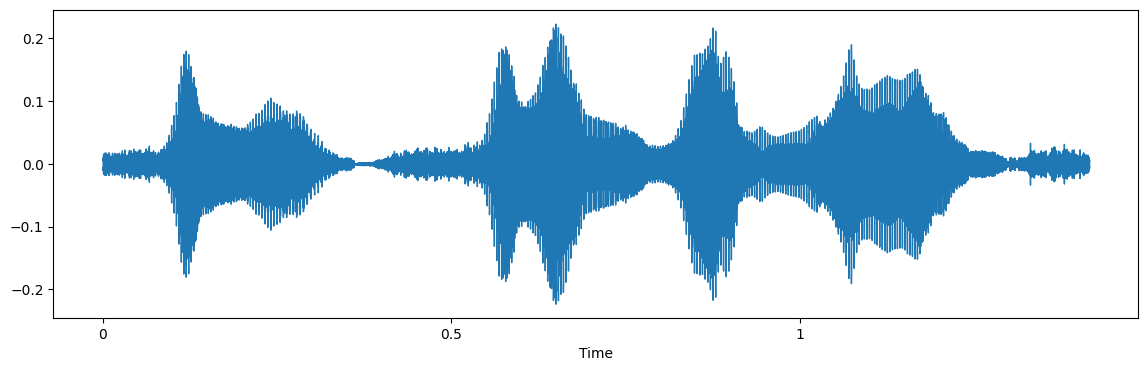

In [27]:
#Shift
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

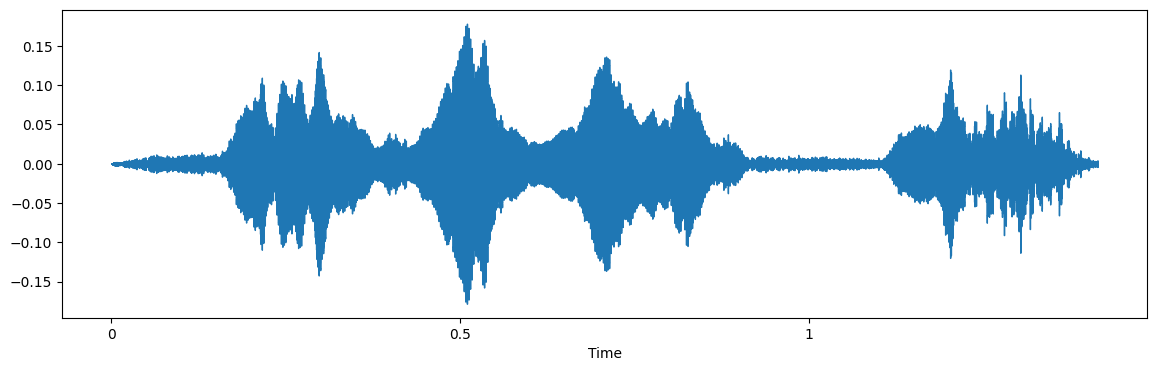

In [28]:
#Pitch
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

## Preparing Dataframe with Features and Label for LSTM 

In [29]:
extracted_features = pd.DataFrame(extracted_features, columns=('features','labels'))
extracted_features.head()

,features,labels
0,"[734.1567, 24.089458, -8.714906, 33.29865, -1....",happy
1,"[767.60846, 30.480682, -11.087088, 28.840864, ...",happy
2,"[741.72455, 33.615017, -8.584269, 8.218266, -9...",happy
3,"[754.98303, 39.89181, -12.923102, 26.20777, -2...",happy
4,"[743.18634, 34.340313, -14.933354, 17.051996, ...",happy


<Axes: xlabel='labels', ylabel='count'>

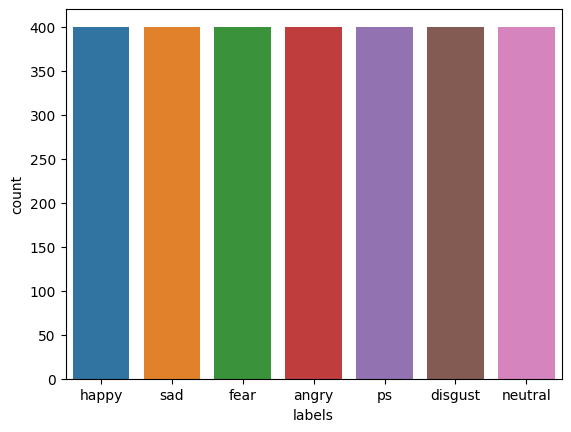

In [30]:
sns.countplot(x = extracted_features.labels, data=extracted_features)

In [31]:
x=np.array(extracted_features['features'].tolist())
y=np.array(extracted_features['labels'].tolist())

In [32]:
print(x.shape,y.shape)

(2800, 128) (2800,)


In [33]:
enc = OneHotEncoder()
y = enc.fit_transform(np.array(extracted_features.labels).reshape(-1,1)).toarray()

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)

In [35]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [36]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [37]:

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(x_train.shape[1],1)), #  Long Short-Term Memory (LSTM) layer with 256 units
    Dropout(0.2), # which helps prevent overfitting by randomly dropping out 20% of the LSTM layer's outputs during training
    Dense(128, activation='relu'), #fully connected dense layer(128 units), 
                                  #ReLU activation function, which performs a linear transformation on the LSTM layer's output and applies rectified linear activation function 
    Dropout(0.2), # dropout layer with a rate of 0.2
    Dense(64, activation='relu'), #fully connected dense layer (64 units) and a ReLU activation function
    Dropout(0.2), # dropout layer with a rate of 0.2
    Dense(7, activation='softmax') #fully connected dense layer(7 unit)s and a softmax activation function, which outputs the predicted probabilities for each of the 7 classes
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [38]:
# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=50, batch_size=64)

Epoch 1/50
35/35 [==============================] - 9s 32ms/step - loss: 1.7576 - accuracy: 0.2616 - val_loss: 1.5677 - val_accuracy: 0.3643
Epoch 2/50
35/35 [==============================] - 0s 12ms/step - loss: 1.5954 - accuracy: 0.3625 - val_loss: 1.4608 - val_accuracy: 0.4304
Epoch 3/50
35/35 [==============================] - 0s 12ms/step - loss: 1.4212 - accuracy: 0.4313 - val_loss: 1.2421 - val_accuracy: 0.5196
Epoch 4/50
35/35 [==============================] - 0s 12ms/step - loss: 1.2422 - accuracy: 0.5045 - val_loss: 1.1899 - val_accuracy: 0.5232
Epoch 5/50
35/35 [==============================] - 0s 12ms/step - loss: 1.2068 - accuracy: 0.5339 - val_loss: 0.9187 - val_accuracy: 0.6393
Epoch 6/50
35/35 [==============================] - 0s 12ms/step - loss: 0.9721 - accuracy: 0.6304 - val_loss: 0.7330 - val_accuracy: 0.7393
Epoch 7/50
35/35 [==============================] - 0s 13ms/step - loss: 0.8684 - accuracy: 0.6763 - val_loss: 0.6678 - val_accuracy: 0.7768
Epoch 8/50
35

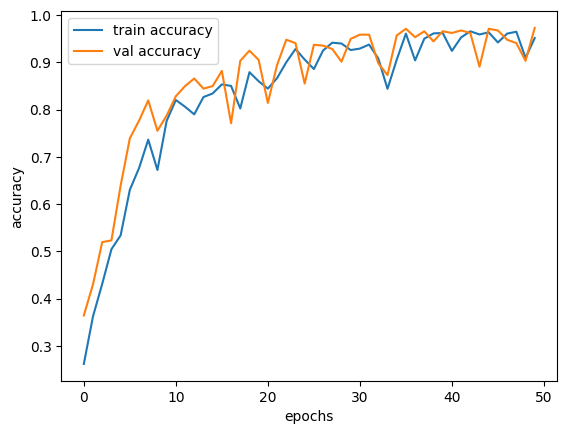

In [39]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

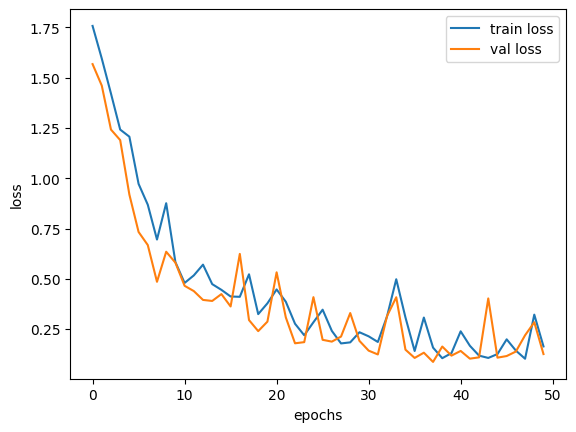

In [40]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [41]:
score=model.evaluate(x_train , y_train)
print ("Training Model evaluation loss: ", round(score[0]*100),"%")
print ("Training Model evaluation accuracy: ", round(score[1]*100),"%")

70/70 [==============================] - 0s 6ms/step - loss: 0.0796 - accuracy: 0.9746
Training Model evaluation loss:  8 %
Training Model evaluation accuracy:  97 %


In [42]:
scores=model.evaluate(x_test , y_test)
print ("Testing Model evaluation loss: ", round(scores[0]*100),"%")
print ("Testing Model evaluation accuracy: ", round(scores[1]*100),"%")

18/18 [==============================] - 0s 7ms/step - loss: 0.1258 - accuracy: 0.9732
Testing Model evaluation loss:  13 %
Testing Model evaluation accuracy:  97 %


## Building New Dataframe to save predicted and actual Labels

In [43]:
pred_test = model.predict(x_test)
y_pred = enc.inverse_transform(pred_test)
y_Test = enc.inverse_transform(y_test)

18/18 [==============================] - 1s 5ms/step


In [44]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_Test.flatten()
df.head()

,Predicted Labels,Actual Labels
0,sad,sad
1,happy,happy
2,sad,sad
3,neutral,neutral
4,angry,angry


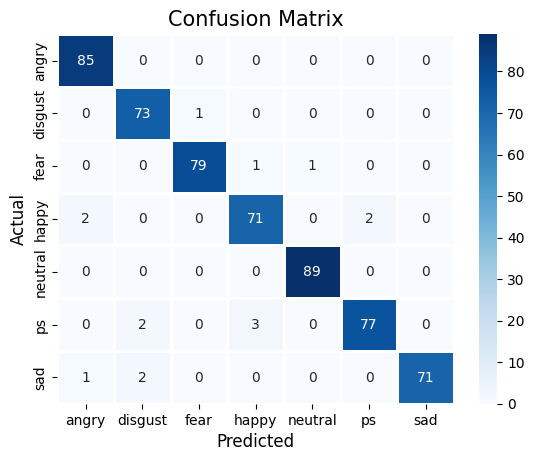

In [45]:
cm = confusion_matrix(y_pred, y_Test)
cm = pd.DataFrame(cm , index = [i for i in enc.categories_] , columns = [i for i in enc.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=15)
plt.xlabel('Predicted', size=12)
plt.ylabel('Actual', size=12)
plt.show()

Confusion Matrix representing the labels are predicted right

In [46]:
print(classification_report(y_Test, y_pred))

              precision    recall  f1-score   support

       angry       1.00      0.97      0.98        88
     disgust       0.99      0.95      0.97        77
        fear       0.98      0.99      0.98        80
       happy       0.95      0.95      0.95        75
     neutral       1.00      0.99      0.99        90
          ps       0.94      0.97      0.96        79
         sad       0.96      1.00      0.98        71

    accuracy                           0.97       560
   macro avg       0.97      0.97      0.97       560
weighted avg       0.97      0.97      0.97       560



## Saving the model & checking out the model working

In [47]:
model.save('Emotions_Classification.h5')

In [48]:
model_audio =  load_model("Emotions_Classification.h5")

n_pred=model_audio.predict(x_test)
#print(n_pred)
n_pred = enc.inverse_transform(n_pred)

18/18 [==============================] - 0s 7ms/step


In [49]:
df['Predicted Labels'] = n_pred.flatten()
df['Actual Labels'] = y_Test.flatten()
df.head()

,Predicted Labels,Actual Labels
0,sad,sad
1,happy,happy
2,sad,sad
3,neutral,neutral
4,angry,angry


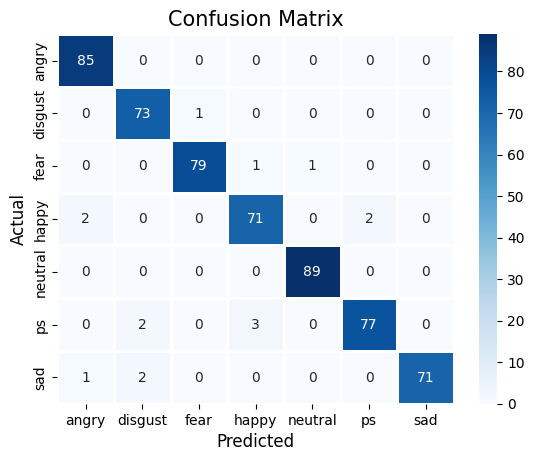

In [50]:
cm = confusion_matrix(n_pred, y_Test)
cm = pd.DataFrame(cm , index = [i for i in enc.categories_] , columns = [i for i in enc.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=15)
plt.xlabel('Predicted', size=12)
plt.ylabel('Actual', size=12)
plt.show()

It is the same as above so it is working same